# Practico bivariado

### Consigna

Realizar un pequenno analisis bivariado, teniendo en cuenta las caracterizticas de la observacion. generando al menos 3 graficos.-

- Camada: 18195
- Tutor: Rober Ribero
- Alumno: Ferreri, Gustavo

### Desarrollo

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import seaborn as sns

In [2]:
#  Incorporamos las funciones desarrolladas en el practico anterior

# Funcion para remover signo
def limpiarSigno (data, *signo):
    for i in range(len(signo)):
        for j in data.columns:
            if data[j].dtypes == 'object':
                data[j] = data[j].str.replace(signo[i],'', regex=True)

# Funcion para cambiar el tipo de datos              
def cambiarTipo (data): 
    for i in data.columns.values: data[i] = data[i].astype('float' if data[i].iloc[0].find('.') == 1 else 'int64')

# Funcion para crear tabla con el diagrama de Pareto
class diagramaPareto:
    def __init__ (self, data):
        self.data = data
        self.serie = self.data.value_counts()
    # Metodo Generico para calcular el acumulado
    def calcularAcumulado (self, data): return list(data.cumsum())  
    def tabla (self):
        # Establecemos el dataframe con los valores absolutos
        df= pd.DataFrame(self.serie)
        df.rename(columns={df.columns.values[0]:'freqAbs'}, inplace = True)
        df['freqAbs _acu'] = self.calcularAcumulado(df['freqAbs'])
        df['freqRel %'] = 100 * df['freqAbs'] / len(self.data.index)
        df['freqRel % _acu'] = self.calcularAcumulado(df['freqRel %'])
        return df

In [3]:
#Cargamos el DataFrame, eliminando la ultima columna recidual con datos vacios
data = pd.read_csv('AnnualTicketSales.csv', na_filter=True, skip_blank_lines=True)
data = data.drop(data.columns[[-1]], axis ='columns')

In [4]:
#Colocamos el Anno como indice del DF
df = pd.DataFrame(data, index=data.index).set_index('YEAR')

In [5]:
#Aplicamos la funcion
limpiarSigno(df, ',', '$')
cambiarTipo(df)

In [6]:
df

,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
YEAR,,,,
2021,423774881,3881777912,3881777912,9.16
2020,223638958,2048534616,2048534616,9.16
2019,1228541629,11253443955,11253444050,9.16
2018,1311536128,11948096650,12013670952,9.11
2017,1225639761,10993991460,11226860216,8.97
2016,1302556378,11267115924,11931416424,8.65
2015,1323356776,11155900636,12121948075,8.43
2014,1257402920,10272985008,11517810744,8.17
2013,1339168926,10887446341,12266787382,8.13


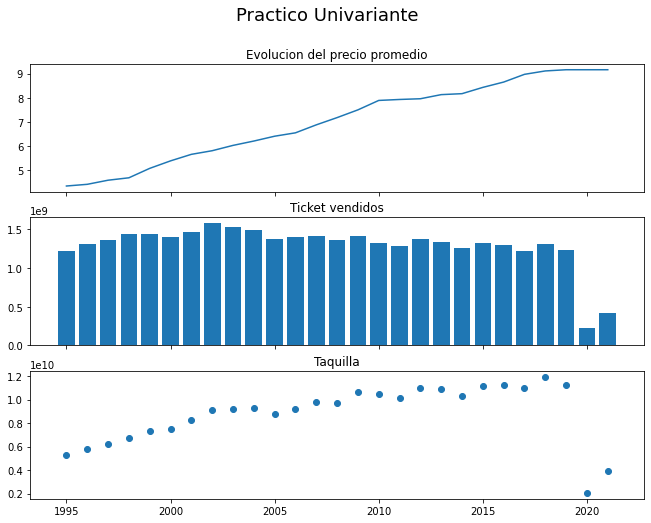

In [7]:
# Incorporamos los analisis previos correspondiente al practico de Univariante
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(11,8), sharex=True)
ax[0].plot(df['AVERAGE TICKET PRICE'])
ax[0].set_title('Evolucion del precio promedio')
ax[1].bar(df.index, df['TICKETS SOLD'])
ax[1].set_title('Ticket vendidos')
ax[2].scatter(df.index, df['TOTAL BOX OFFICE'])
ax[2].set_title('Taquilla')
plt.suptitle('Practico Univariante', fontsize='18')
plt.show()

### Desarrollamos una solucion

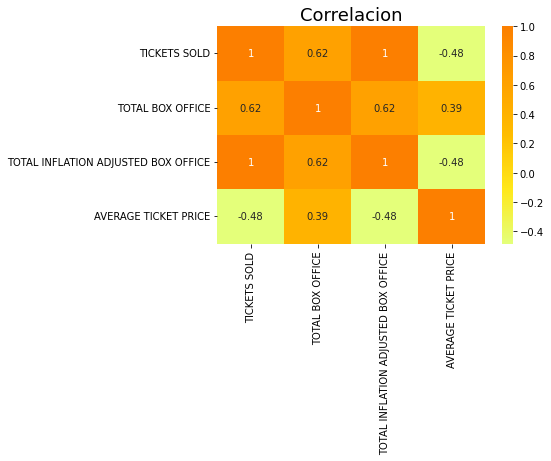

In [8]:
ax = plt.axes()
sns.heatmap(df.corr(), annot=True, cmap='Wistia', ax= ax)
ax.set_title('Correlacion', fontsize=18)
plt.show()

In [9]:
display(pg.corr(df['TICKETS SOLD'], df['AVERAGE TICKET PRICE'], method='pearson'),
pg.corr(df['TICKETS SOLD'], df['TOTAL BOX OFFICE'], method='pearson'),
pg.corr(df['TOTAL BOX OFFICE'], df['AVERAGE TICKET PRICE'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,27,-0.484782,"[-0.73, -0.13]",0.010384,5.403,0.749676


,n,r,CI95%,p-val,BF10,power
pearson,27,0.615514,"[0.31, 0.81]",0.000632,60.744,0.946237


,n,r,CI95%,p-val,BF10,power
pearson,27,0.38543,"[0.01, 0.67]",0.047094,1.555,0.524965


In [10]:
display(pg.corr(df['TICKETS SOLD'], df['AVERAGE TICKET PRICE'], method='kendall'),
pg.corr(df['TICKETS SOLD'], df['TOTAL BOX OFFICE'], method='kendall'),
pg.corr(df['TOTAL BOX OFFICE'], df['AVERAGE TICKET PRICE'], method='kendall'))

,n,r,CI95%,p-val,power
kendall,27,-0.452079,"[-0.71, -0.09]",0.000979,0.67907


,n,r,CI95%,p-val,power
kendall,27,-0.065527,"[-0.43, 0.32]",0.649567,0.061736


,n,r,CI95%,p-val,power
kendall,27,0.618031,"[0.31, 0.81]",0.000007,0.948402


In [11]:
display(pg.corr(df['TICKETS SOLD'], df['AVERAGE TICKET PRICE'], method='spearman'),
pg.corr(df['TICKETS SOLD'], df['TOTAL BOX OFFICE'], method='spearman'),
pg.corr(df['TOTAL BOX OFFICE'], df['AVERAGE TICKET PRICE'], method='spearman'))

,n,r,CI95%,p-val,power
spearman,27,-0.569334,"[-0.78, -0.24]",0.001939,0.895475


,n,r,CI95%,p-val,power
spearman,27,-0.075702,"[-0.44, 0.31]",0.707448,0.065907


,n,r,CI95%,p-val,power
spearman,27,0.58033,"[0.26, 0.79]",0.001507,0.909499


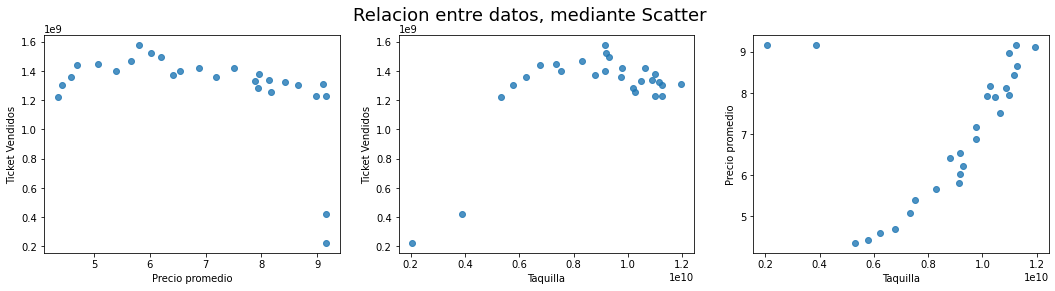

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))
ax[0].scatter(x= df['AVERAGE TICKET PRICE'], y= df['TICKETS SOLD'], alpha= 0.8)
ax[0].set_xlabel('Precio promedio')
ax[0].set_ylabel('Ticket Vendidos');
ax[1].scatter(x=df['TOTAL BOX OFFICE'], y= df['TICKETS SOLD'], alpha= 0.8)
ax[1].set_xlabel('Taquilla')
ax[1].set_ylabel('Ticket Vendidos');
ax[2].scatter(x=df['TOTAL BOX OFFICE'], y= df['AVERAGE TICKET PRICE'], alpha= 0.8)
ax[2].set_xlabel('Taquilla')
ax[2].set_ylabel('Precio promedio');
plt.suptitle('Relacion entre datos, mediante Scatter', fontsize=18)
plt.show()

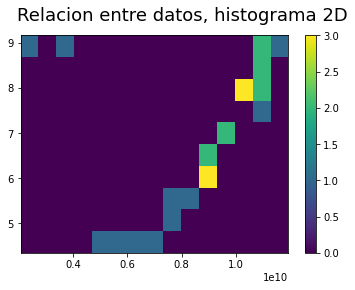

In [13]:
plt.hist2d(df['TOTAL BOX OFFICE'], df['AVERAGE TICKET PRICE'], bins = (15, 10));
plt.colorbar();
plt.suptitle('Relacion entre datos, histograma 2D', fontsize=18)
plt.show()